<a href="https://colab.research.google.com/github/aferte/cosmopower_cosmosis/blob/master/cosmopower_trainingPkDES_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based on https://colab.research.google.com/drive/1eiDX_P0fxcuxv530xr2iceaPbY4CA5pD#scrollTo=YYsBo-3R1Nl-
Here we want train an NN on P(k) with DES parameters and priors

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import display, clear_output

In [ ]:
# checking that we are using a GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun Jul 17 03:04:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')

In [ ]:
# setting the seed for reproducibility
np.random.seed(1)
tf.random.set_seed(2)

Installing cosmopower

In [ ]:
!pip install cosmopower

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 12.6 MB/s 
     |████████████████████████████████| 217 kB 71.7 MB/s 
     |████████████████████████████████| 3.7 MB 40.7 MB/s 
     |████████████████████████████████| 1.1 MB 62.6 MB/s 
     |████████████████████████████████| 133 kB 69.5 MB/s 
     |████████████████████████████████| 78 kB 8.6 MB/s 
  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18184 sha256=dd6f6fc7da620c169d86c1357ef41360d4b39dad1675023d186776d199bea7cb
  Stored in directory: /root/.cache/pip/wheels/83/ce/8a/87b25c685bfeca1872d13b8dc101e087a9c6e3fb5ebb47022a
Successfully built pyDOE
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
     

Reading training set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#download to collab
import gdown
gdown.download_folder('https://drive.google.com/drive/folders/1SMSt0oLe21-jaw0LMsmVnJFuNjTUDSwJ')

Retrieving folder list


Processing file 1G3XFZa-1aFxyzxf4NKCvJyG2EgMMBmKh input_cosmo.npy
Processing file 1vD7N5VDsDi36y4jaDW2VDdtD8rjUSlAz lhs_cosmo.npz
Processing file 1qMfUDU9p3E8Dv7NUyfyo2crJ7HIXhveK matter_pk_k.npy
Processing file 11mw_U6Jx0tbbVXLYY0f4knSRKc-ZKU98 matter_pk_z.npy
Processing file 1KQZ2Svh4ot0OPtUWErR6_jrB-DnY-hQ6 matter_pk.npy
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1G3XFZa-1aFxyzxf4NKCvJyG2EgMMBmKh
To: /content/DES_y6_training_pk/input_cosmo.npy
100%|██████████| 288/288 [00:00<00:00, 121kB/s]
Downloading...
From: https://drive.google.com/uc?id=1vD7N5VDsDi36y4jaDW2VDdtD8rjUSlAz
To: /content/DES_y6_training_pk/lhs_cosmo.npz
100%|██████████| 666/666 [00:00<00:00, 802kB/s]
Downloading...
From: https://drive.google.com/uc?id=1qMfUDU9p3E8Dv7NUyfyo2crJ7HIXhveK
To: /content/DES_y6_training_pk/matter_pk_k.npy
100%|██████████| 56.1k/56.1k [00:00<00:00, 23.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=11mw_U6Jx0tbbVXLYY0f4knSRKc-ZKU98
To: /content/DES_y6_training_pk/matter_pk_z.npy
100%|██████████| 12.1k/12.1k [00:00<00:00, 4.19MB/s]
Downloading...
From: https://drive.google.com/uc?id=1KQZ2Svh4ot0OPtUWErR6_jrB-DnY-hQ6
To: /content/DES_y6_training_pk/matter_pk.npy
100%|██████████| 8.40M/8.40M [00:00<00:00, 238MB/s]
Download completed

['/content/DES_y6_training_pk/input_cosmo.npy',
 '/content/DES_y6_training_pk/lhs_cosmo.npz',
 '/content/DES_y6_training_pk/matter_pk_k.npy',
 '/content/DES_y6_training_pk/matter_pk_z.npy',
 '/content/DES_y6_training_pk/matter_pk.npy']

In [ ]:
training_parameters = np.load('/content/DES_y6_training_pk/input_cosmo.npy')

In [ ]:
pk   = np.load('/content/DES_y6_training_pk/matter_pk.npy')
pk_k = np.load('/content/DES_y6_training_pk/matter_pk_k.npy')
pk_z = np.load('/content/DES_y6_training_pk/matter_pk_z.npy')

In [ ]:
training_parameters

array([[3.66666667e-01, 2.00000000e-09],
       [7.22222222e-01, 5.00000000e-09],
       [6.33333333e-01, 2.50000000e-09],
       [2.77777778e-01, 5.00000000e-10],
       [9.00000000e-01, 1.50000000e-09],
       [1.88888889e-01, 1.00000000e-09],
       [1.00000000e-01, 3.00000000e-09],
       [4.55555556e-01, 4.50000000e-09],
       [8.11111111e-01, 4.00000000e-09],
       [5.44444444e-01, 3.50000000e-09]])

Training

In [ ]:
# list of parameter names, in arbitrary order
model_parameters = ['omega_m',
                    'A_s', 
                    ]

In [ ]:
pk_k[0,:]

array([1.00000000e-04, 1.02231245e-04, 1.04512274e-04, 1.06844198e-04,
       1.09228154e-04, 1.11665301e-04, 1.14156827e-04, 1.16703945e-04,
       1.19307895e-04, 1.21969946e-04, 1.24691394e-04, 1.27473564e-04,
       1.30317811e-04, 1.33225520e-04, 1.36198108e-04, 1.39237020e-04,
       1.42343739e-04, 1.45519776e-04, 1.48766678e-04, 1.52086027e-04,
       1.55479438e-04, 1.58948564e-04, 1.62495096e-04, 1.66120759e-04,
       1.69827319e-04, 1.73616582e-04, 1.77490393e-04, 1.81450637e-04,
       1.85499245e-04, 1.89638187e-04, 1.93869479e-04, 1.98195181e-04,
       2.02617400e-04, 2.07138290e-04, 2.11760052e-04, 2.16484937e-04,
       2.21315245e-04, 2.26253329e-04, 2.31301595e-04, 2.36462499e-04,
       2.41738556e-04, 2.47132334e-04, 2.52646461e-04, 2.58283622e-04,
       2.64046561e-04, 2.69938085e-04, 2.75961064e-04, 2.82118431e-04,
       2.88413183e-04, 2.94848387e-04, 3.01427175e-04, 3.08152753e-04,
       3.15028395e-04, 3.22057449e-04, 3.29243338e-04, 3.36589562e-04,
      

In [ ]:
from cosmopower import cosmopower_NN


In [ ]:
# instantiate NN class
cp_nn = cosmopower_NN(parameters=model_parameters, 
                      modes=pk_k[0,:], 
                      n_hidden = [512, 512], # 4 hidden layers, each with 512 nodes
                      verbose=True, # useful to understand the different steps in initialisation and training
                      )


Initialized cosmopower_NN model, 
mapping 2 input parameters to 700 output modes, 
using 2 hidden layers, 
with [512, 512] nodes, respectively. 



In [ ]:
training_parameters_nn = {'omega_m':training_parameters[:,0],'A_s':training_parameters[:,1]} 

In [ ]:
pk[:,0,:].shape

(10, 700)

In [ ]:
with tf.device('/device:GPU:0'): # ensures we are running on a GPU
    # train
    cp_nn.train(training_parameters=training_parameters_nn,
                training_features=pk[:,0,:],
                filename_saved_model='pk_NN_z0_example',
                # cooling schedule
                validation_split=0.1,
                learning_rates=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
                batch_sizes=[1024, 1024, 1024, 1024, 1024],
                gradient_accumulation_steps = [1, 1, 1, 1, 1],
                # early stopping set up
                patience_values = [100,100,100,100,100],
                max_epochs = [1000,1000,1000,1000,1000],
                )

Starting cosmopower_NN training, 
using 10 per cent of training samples for validation. 
Performing 5 learning steps, with 
[0.01, 0.001, 0.0001, 1e-05, 1e-06] learning rates 
[1024, 1024, 1024, 1024, 1024] batch sizes 
[1, 1, 1, 1, 1] gradient accumulation steps 
[100, 100, 100, 100, 100] patience values 
[1000, 1000, 1000, 1000, 1000] max epochs 

learning rate = 0.01, batch size = 1024


 15%|█▍        | 146/1000 [00:06<00:37, 23.08it/s, loss=3.51e+3]


Validation loss = 3023.1028
Model saved.
Reached max number of epochs. Validation loss = 3023.1028
Model saved.
learning rate = 0.001, batch size = 1024


 10%|█         | 100/1000 [00:01<00:17, 51.45it/s, loss=3.8e+3]


Validation loss = 3584.388
Model saved.
Reached max number of epochs. Validation loss = 3584.388
Model saved.
learning rate = 0.0001, batch size = 1024


 10%|█         | 100/1000 [00:01<00:17, 52.18it/s, loss=1.08e+3]


Validation loss = 18.370277
Model saved.
Reached max number of epochs. Validation loss = 18.370277
Model saved.
learning rate = 1e-05, batch size = 1024


 10%|█         | 100/1000 [00:02<00:21, 41.81it/s, loss=161]


Validation loss = 107.23137
Model saved.
Reached max number of epochs. Validation loss = 107.23137
Model saved.
learning rate = 1e-06, batch size = 1024


 10%|█         | 100/1000 [00:01<00:17, 51.67it/s, loss=375]


Validation loss = 340.23853
Model saved.
Reached max number of epochs. Validation loss = 340.23853
Model saved.


Testing

In [ ]:
ls

DES_y6_training_pk/  drive/  pk_NN_z0_example.pkl  sample_data/


In [ ]:
p_nn = cosmopower_NN(restore=True, 
                      restore_filename='pk_NN_z0_example',
                      )

In [ ]:
predicted_testing_spectra = cp_nn.ten_to_predictions_np(training_parameters_nn)

/usr/local/lib/python3.7/dist-packages/cosmopower/cosmopower_NN.py:383: RuntimeWarning: overflow encountered in power
  return 10.**self.predictions_np(parameters_dict)


In [ ]:
pred.shape

(150, 700)

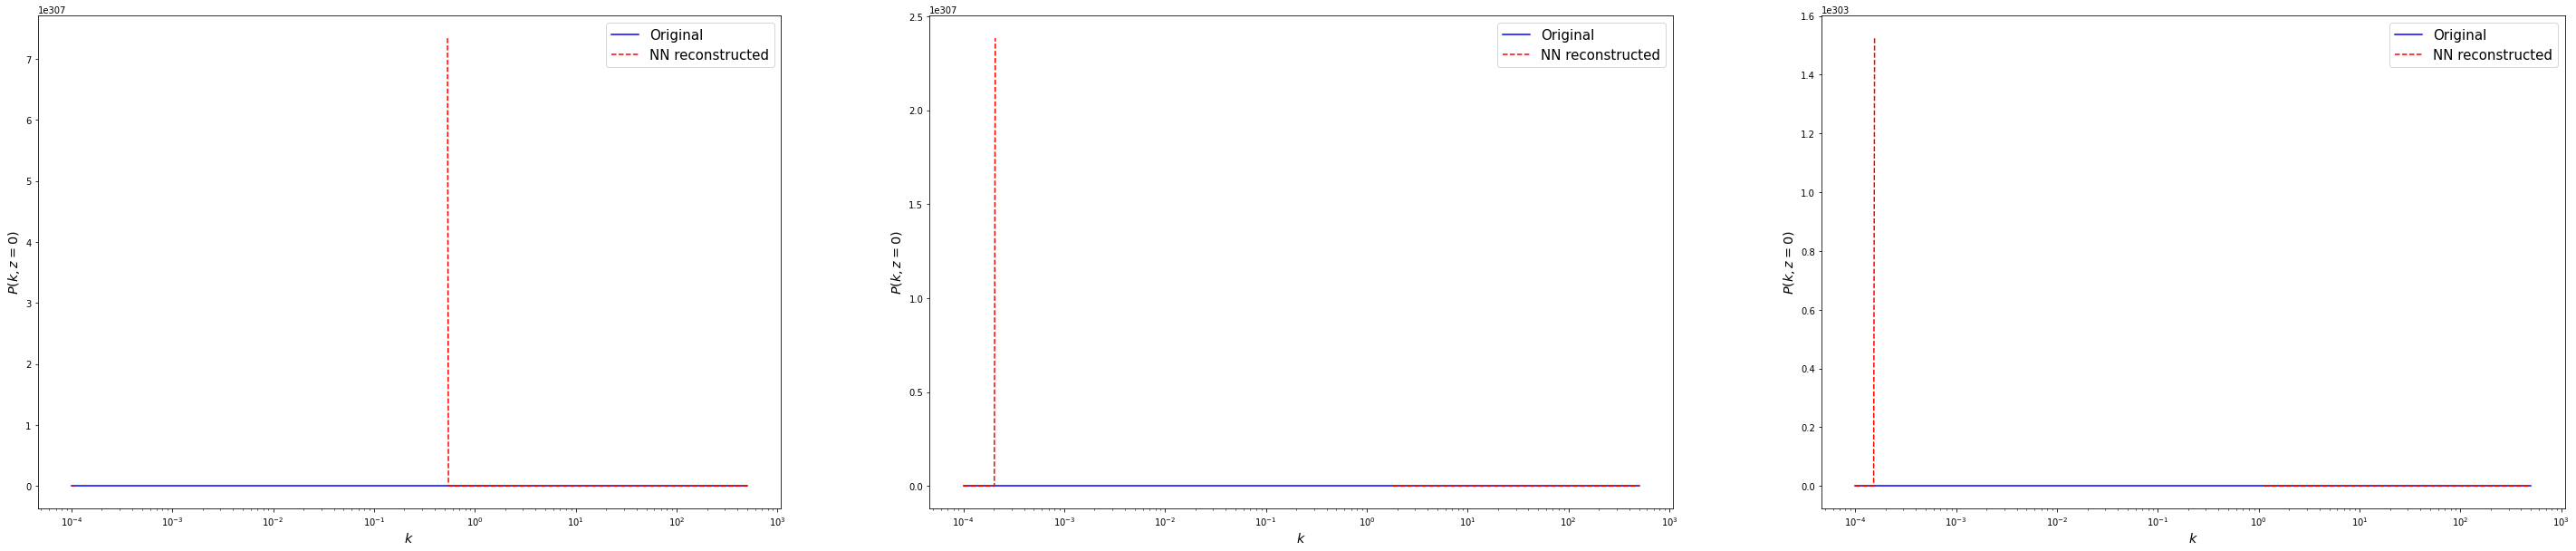

In [ ]:
from matplotlib import gridspec
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(50,10))
for i in range(3):
    pred = predicted_testing_spectra[i]
    true = pk[i][0]
    ax[i].semilogx(pk_k[i], true, 'blue', label = 'Original')
    ax[i].semilogx(pk_k[i], pred, 'red', label = 'NN reconstructed', linestyle='--')
    ax[i].set_xlabel('$k$', fontsize='x-large')
    ax[i].set_ylabel('$P(k,z=0)$', fontsize='x-large')
    ax[i].legend(fontsize=15)
plt.savefig('examples_reconstruction_pk.pdf')